In [1]:
import tensorflow as tf

2022-02-14 10:23:08.385140: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

2022-02-14 10:23:09.650074: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-14 10:23:09.651044: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-14 10:23:09.673247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 10:23:09.673775: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-14 10:23:09.673795: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-02-14 10:23:09.676521: I tensorflow/stream_executor/platform/default/dso_loade

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os, shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from tensorflow.keras.preprocessing.text import Tokenizer

# RNN
- 순환신경망
- 시계열 데이터에 적합

## IMDB에 RNN 사용하기
- 정수인덱싱 바로 받아오기

In [4]:
from tensorflow.keras.datasets import imdb

In [5]:
max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

In [6]:
x_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
x_train = tf.keras.preprocessing.sequence.pad_sequences( x_train, maxlen = maxlen )
x_test = tf.keras.preprocessing.sequence.pad_sequences( x_test, maxlen = maxlen )

## 네트워크 구성

In [8]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Embedding( max_features, 32 ))
model.add( tf.keras.layers.SimpleRNN(32) )
model.add( tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
  loss='binary_crossentropy',
  metrics = ['acc'],
  optimizer = 'rmsprop'
)

2022-02-14 09:22:33.164826: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-14 09:22:33.165029: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-14 09:22:33.165210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 09:22:33.165802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-14 09:22:33.

In [9]:
hist = model.fit( x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

2022-02-14 09:22:45.004793: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-14 09:22:45.023606: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/10


2022-02-14 09:22:45.848346: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-02-14 09:22:46.371734: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


157/157 [==============================] - 40s 247ms/step - loss: 0.6282 - acc: 0.6284 - val_loss: 0.4119 - val_acc: 0.8318
Epoch 2/10
157/157 [==============================] - 39s 246ms/step - loss: 0.3414 - acc: 0.8651 - val_loss: 0.3225 - val_acc: 0.8688
Epoch 3/10
157/157 [==============================] - 39s 245ms/step - loss: 0.2683 - acc: 0.8990 - val_loss: 0.4060 - val_acc: 0.8082
Epoch 4/10
157/157 [==============================] - 38s 245ms/step - loss: 0.2244 - acc: 0.9158 - val_loss: 0.3343 - val_acc: 0.8720
Epoch 5/10
157/157 [==============================] - 39s 246ms/step - loss: 0.1652 - acc: 0.9404 - val_loss: 0.3633 - val_acc: 0.8544
Epoch 6/10
157/157 [==============================] - 38s 244ms/step - loss: 0.1183 - acc: 0.9598 - val_loss: 0.3934 - val_acc: 0.8666
Epoch 7/10
157/157 [==============================] - 39s 246ms/step - loss: 0.0944 - acc: 0.9672 - val_loss: 0.5232 - val_acc: 0.8510
Epoch 8/10
157/157 [==============================] - 39s 246ms/st

RNN은 CNN에 비해 속도가 느림

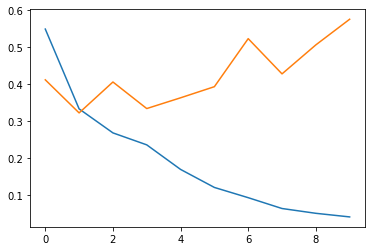

In [10]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')

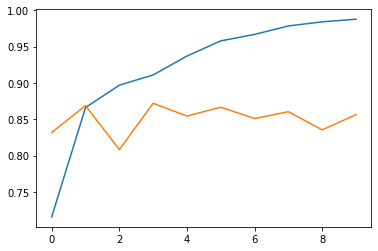

In [11]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')

# LSTM and GRU

**RNN**
- tanh을 반복해서 진행
- 이전에 학습했던 내용을 다음에도 반영할 수 있게끔 설정
- 자연어 처리 시 그냥 RNN을 사용하진 않고 LSTM, GRU를 사용함

## LSTM
- RNN의 단점(직전 데이터 말고 완전 예전의 데이터를 반영할 수 없음)을 개선한 모형
- 게이트를 설정 -> 전달받은 내용을 선택적으로 전달
- 일반적으로 많이 쓰임

In [7]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Embedding( max_features, 32 ))
model.add( tf.keras.layers.LSTM(32) )
model.add( tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
  loss='binary_crossentropy',
  metrics = ['acc'],
  optimizer = 'rmsprop'
)

In [10]:
hist = model.fit( x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

2022-02-14 10:03:07.558027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-14 10:03:07.575629: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/10


2022-02-14 10:03:09.114707: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-02-14 10:03:09.727499: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-02-14 10:03:09.775951: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


157/157 [==============================] - 12s 44ms/step - loss: 0.6095 - acc: 0.6498 - val_loss: 0.3710 - val_acc: 0.8492
Epoch 2/10
157/157 [==============================] - 6s 41ms/step - loss: 0.3050 - acc: 0.8833 - val_loss: 0.7845 - val_acc: 0.7464
Epoch 3/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2548 - acc: 0.9094 - val_loss: 0.3047 - val_acc: 0.8720
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1893 - acc: 0.9328 - val_loss: 0.3104 - val_acc: 0.8656
Epoch 5/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1751 - acc: 0.9381 - val_loss: 0.2840 - val_acc: 0.8928
Epoch 6/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1508 - acc: 0.9472 - val_loss: 0.4106 - val_acc: 0.8816
Epoch 7/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1413 - acc: 0.9513 - val_loss: 0.2992 - val_acc: 0.8858
Epoch 8/10
157/157 [==============================] - 4s 24ms/step - loss: 0.11

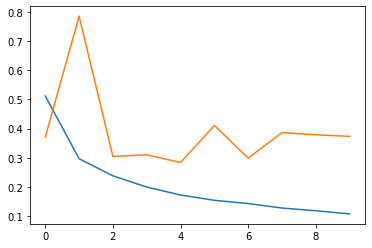

In [12]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')

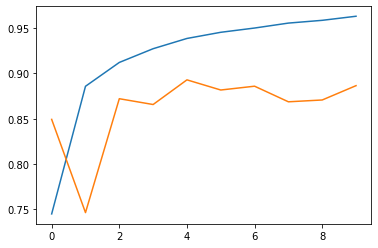

In [13]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')

- 전체적으로 더 나은 정확도를 보여주지만, 성능이 획기적으로 좋아졌다곤 할 수 없음
- 하이퍼 파라미터에 대한 튜닝을 하지 않아서 그런 것으로 보여짐
 - 네트워크 구성(레이더 개수, 노드 개수), 최적화 알고리즘(rmsprop), 학습률 튜닝, 규제(L1,L2.Dropout) 등을 설정하지 않음
- 리뷰를 전체적으로 길게 분석하는(LSTM) 방법은 감성분류에 도움 x

- 즉, 단어들의 순서가 리뷰 긍정 부정을 판단하진 않음
- 순서보단 단어의 빈도가 더 영향을 줌

## GRU
- 이전 정보(hidden state)에도 게이트가 존재하여 영향을 줄지 말지를 판단

# 컨브넷을 이용한 텍스트 처리
- CNN 이용
- RNN보다 속도가 빠름
- conv1D 사용

In [9]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Embedding( max_features, 128, input_length=maxlen ))
model.add( tf.keras.layers.Conv1D(32, 7, activation='relu'))
model.add( tf.keras.layers.MaxPool1D(5))
model.add( tf.keras.layers.Conv1D(32, 7, activation='relu'))
model.add( tf.keras.layers.GlobalMaxPool1D())
model.add( tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
  loss='binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [10]:
hist = model.fit( x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 7s 37ms/step - loss: 0.6930 - acc: 0.5091 - val_loss: 0.6908 - val_acc: 0.5382
Epoch 2/10
157/157 [==============================] - 6s 36ms/step - loss: 0.6860 - acc: 0.6550 - val_loss: 0.6845 - val_acc: 0.6568
Epoch 3/10
157/157 [==============================] - 6s 36ms/step - loss: 0.6740 - acc: 0.7585 - val_loss: 0.6579 - val_acc: 0.7198
Epoch 4/10
157/157 [==============================] - 6s 36ms/step - loss: 0.6347 - acc: 0.7866 - val_loss: 0.5710 - val_acc: 0.8020
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.5271 - acc: 0.8255 - val_loss: 0.4479 - val_acc: 0.8246
Epoch 6/10
157/157 [==============================] - 6s 36ms/step - loss: 0.4012 - acc: 0.8562 - val_loss: 0.3707 - val_acc: 0.8436
Epoch 7/10
157/157 [==============================] - 5s 32ms/step - loss: 0.3234 - acc: 0.8738 - val_loss: 0.3345 - val_acc: 0.8574
Epoch 8/10
157/157 [==============================] - 5s 29ms/step - 

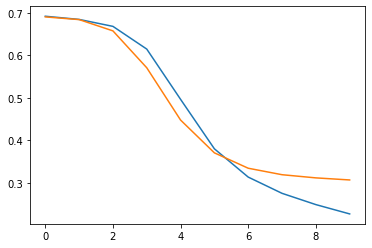

In [11]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')

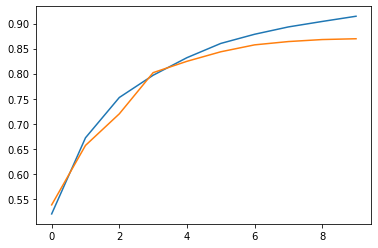

In [12]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')

- CNN이 더 뛰어난 성능, 빠른 속도를 보여줌